In [1]:
MODEL = "ollama:qwen2.5:1.5b"

# Structured Output

In [2]:
from pydantic import BaseModel

from pydantic_ai import Agent


class CityLocation(BaseModel):
    city: str
    country: str


agent = Agent(MODEL, output_type=CityLocation)

result = await agent.run("Where were the olympics held in 2012?")

print(result.output)

city='London' country='United Kingdom'


## Few-shot examples*


Few-shot prompting is a technique where you provide a few examples of the task you want the model to perform within the prompt itself. This helps the model understand the context and the desired output format, leading to more accurate and consistent results. It's particularly useful for tasks that require a specific structure or when you want to guide the model's behavior without fine-tuning it.



In [12]:
from typing import Literal
from pydantic import BaseModel, Field
from pydantic_ai import Agent


class SentimentAnalysis(BaseModel):
    sentiment: Literal["Positive", "Negative", "Neutral"] = Field(
        description="The sentiment of the text."
    )


few_shot_system_prompt = """
You are a sentiment analysis expert specializing in software user feedback.

### Examples:
User text: "I love how the app freezes every time I try to export. Really keeps me on my toes!"
Response: {"sentiment": "Negative"}
User text: "There's a charming little bug where my profile picture rotates 360 degrees when clicked. Hilarious, but not sure it's intentional."
Response: {"sentiment": "Negative"}
User text: "Is there really no way to undo changes? Am I missing something obvious here?"
Response: {"sentiment": "Negative"}
User text: "Adding keyboard shortcuts would be a game-changer for power users like me!"
Response: {"sentiment": "Positive"}
User text: "My only issue is that this tool works so well, I can't justify using anything else. Great work!"
Response: {"sentiment": "Positive"}
User text: "The API should support pagination for large result sets."
Response: {"sentiment": "Neutral"}
"""

agent = Agent(
    MODEL,
    output_type=SentimentAnalysis,
    system_prompt=few_shot_system_prompt,
    retries=9,
)

result = await agent.run(
    """Am I missing something, or is there really no way to batch-edit records?"""
)
print(result.output)

sentiment='Negative'


In [10]:
from typing import Literal
from pydantic import BaseModel, Field
from pydantic_ai import Agent


class SentimentAnalysis(BaseModel):
    sentiment: Literal["Positive", "Negative", "Neutral"] = Field(
        description="The sentiment of the text."
    )


few_shot_system_prompt = """
You are a sentiment analysis expert specializing in software user feedback.
"""

agent = Agent(
    MODEL,
    output_type=SentimentAnalysis,
    system_prompt=few_shot_system_prompt,
    retries=9,
)

result = await agent.run(
    """Am I missing something, or is there really no way to batch-edit records?"""
)
print(result.output)

sentiment='Neutral'


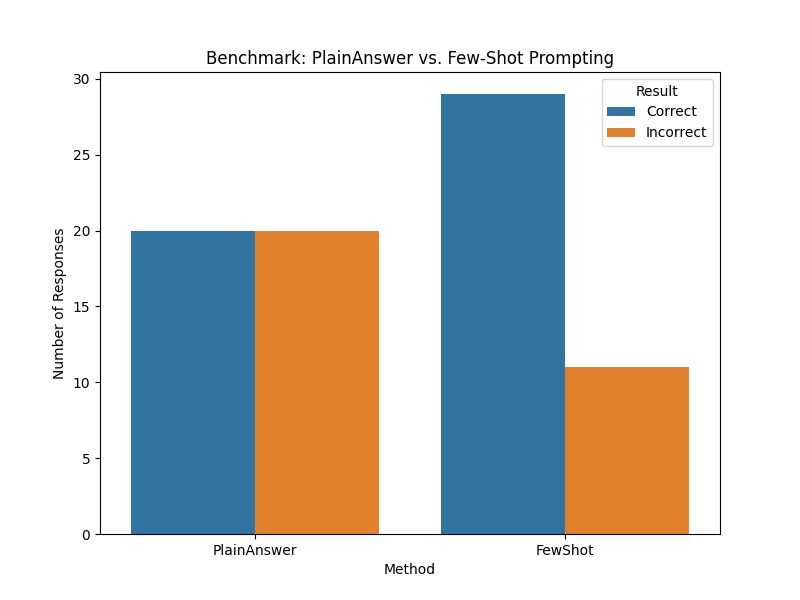

## Chain of Thought*

Chain of Thought (CoT) prompting is a technique that encourages the model to generate a series of intermediate reasoning steps before giving a final answer. This is particularly useful for complex problems that require logic, arithmetic, or multi-step reasoning. By thinking step-by-step, the model is more likely to arrive at the correct conclusion.

In [3]:
from pydantic import BaseModel, Field
from pydantic_ai import Agent


class PlainAnswer(BaseModel):
    answer: int = Field(description="Answer to the question")


agent = Agent(MODEL, output_type=PlainAnswer, retries=10)

prompt = ("How many times does the letter 'r' appear in the word 'strawberry'?",)

result = await agent.run(prompt)
print(result.output)

answer=4


In [4]:
from pydantic import BaseModel
from pydantic_ai import Agent


class CoTAnswer(BaseModel):
    thinking: str = Field(
        description=(
            "First, break down the user's question to identify the core task. "
            "Second, outline the sequential steps required to solve the task. "
            "Third, execute each step, showing your reasoning and any calculations involved. "
            "The thinking process should logically lead to the final answer."
        )
    )
    answer: int = Field(
        description="The final numerical answer derived from the step-by-step thinking process."
    )


agent = Agent(MODEL, output_type=CoTAnswer, retries=10)

prompt = "How many times does the letter 'r' appear in the word 'strawberry'?"

result = await agent.run(prompt)
print("Thinking process:")
print(result.output.thinking)
print("\nFinal Answer:")
print(result.output.answer)

Thinking process:
To solve this problem, we need to break down the user's question and outline sequential steps. We first look at the word given, strawberry. Then, we find how many times the letter 'r' appears in it by going through each character individually.

Final Answer:
3


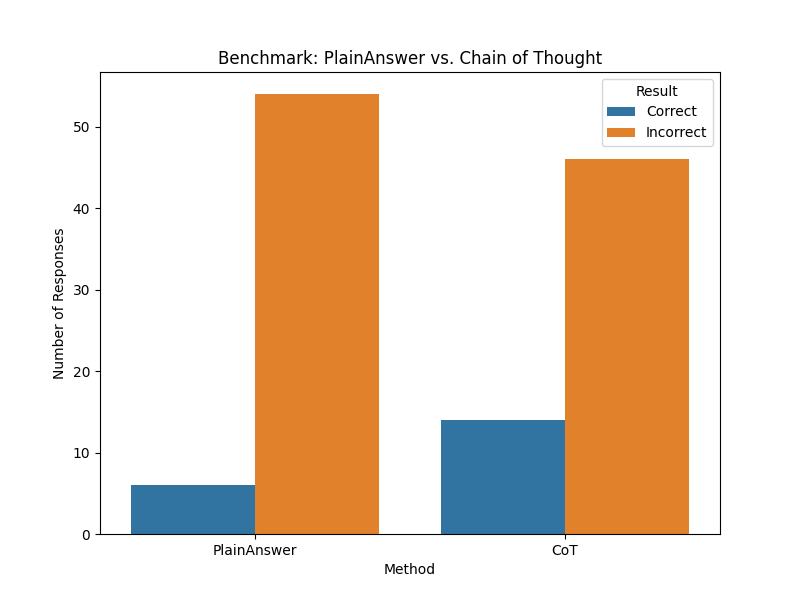

---

### Real-World Applications

**1. Financial Document Processing - Hitachi India**
- Trained models on 50+ different bank statement formats using few-shot learning
- Process 36,000+ bank statements monthly with 99% accuracy
- Few examples per format enable quick adaptation to new document types
- Source: [ITRex Group Case Study](https://itrexgroup.com/blog/few-shot-learning-how-ai-learns-faster-with-less-data/)

**2. Manufacturing Quality Control**
- Visual inspection systems detect new defect types with minimal examples
- Few-shot learning enables adaptation without extensive labeled datasets
- Reduces production downtime while maintaining quality standards
- Source: [UnitX Labs](https://www.unitxlabs.com/resources/few-shot-learning-machine-vision-system-2025-adaptation-ai/)


---

## 🎯 Task 1: Define a Pydantic Model

**Objective**: Create a `MovieRecommendation` model with appropriate fields.

**Instructions**:
- Complete the `MovieRecommendation` class below by adding three fields:
  - `title` (string): The movie title
  - `genre` (string): The movie genre
  - `year` (integer): The year the movie was released
- Use the model with an agent to get movie recommendations


In [ ]:
from pydantic import BaseModel
from pydantic_ai import Agent


class MovieRecommendation(BaseModel):
    # TODO: Add fields
    pass

#TODO: Add output type to the Agent
agent = Agent(MODEL)

result = await agent.run("Recommend a classic science fiction movie")

print(f"Title: {result.output.title}")
print(f"Genre: {result.output.genre}")
print(f"Year: {result.output.year}")


## 🎯 Task 2: Add Few-Shot Examples for Language Detection*

**Objective**: Improve a code language classifier by adding few-shot examples.

**Instructions**:
- Review the system prompt below that classifies code snippets as Python or C++
- Add 2-3 few-shot examples showing both Python and C++ code
- Make sure your examples clearly show distinguishing features of each language
- Test your improved prompt with the provided C++ code snippet


In [ ]:
from typing import Literal
from pydantic import BaseModel, Field
from pydantic_ai import Agent


class LanguageDetection(BaseModel):
    language: Literal["Python", "C++"] = Field(
        description="The programming language of the code snippet"
    )


# TODO: Add 2-3 few-shot examples here showing Python and C++ code
system_prompt = """
You are an expert at identifying programming languages from code snippets.
"""

agent = Agent(
    MODEL,
    output_type=LanguageDetection,
    system_prompt=system_prompt,
    retries=9,
)

# Test with a code snippet
test_code = """
int fibonacci(int x) {
   if (x == 0 || x == 1) {
       return x;
   } else {
       return fibonacci(x - 1) + fibonacci(x - 2);
   }
}
"""

result = await agent.run(f"What language is this code?\n\n{test_code}")
print(f"Detected language: {result.output.language}")
print("Expected: C++")


Detected language: Python
Expected: C++
